In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u
import utilities as ut
from utilities.constant import pc_per_cm, kpc_per_cm

In [5]:
def plot2d(x, y, value, cmap = 'viridis', norm = None, vmin = None, vmax = None, **kwargs):
    counts, xbins, ybins = np.histogram2d(x, y, **kwargs)
    sums, _, _ = np.histogram2d(x, y, weights = value, **kwargs)

    with np.errstate(divide='ignore', invalid='ignore'):  # suppress possible divide-by-zero warnings
        plot = plt.pcolormesh(ybins, xbins, sums / counts, cmap = cmap, norm = norm, vmin = vmin, vmax = vmax)

    return plot

### Shattering plots

Text(0.5, 1.0, 'm12f')

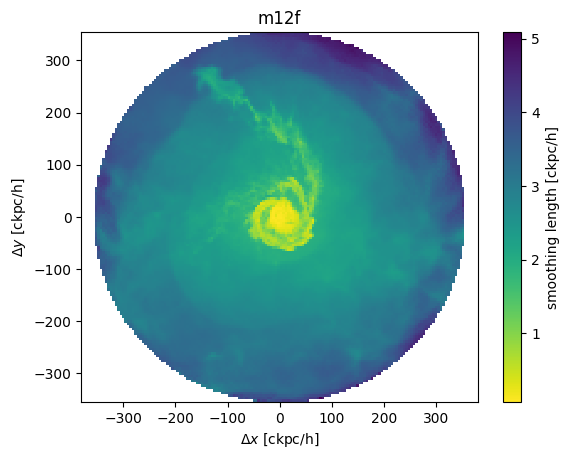

In [14]:
# plot binsize
binsize_plot = plot2d(halo_gas['dist_x'], halo_gas['dist_y'], value = halo_gas['smoothing_len'], cmap = 'viridis_r', bins = [150,150])

plt.xlabel('$\Delta x$ [ckpc/h]')
plt.ylabel('$\Delta y$ [ckpc/h]')
plt.axis('equal')
plt.colorbar(binsize_plot, label = 'smoothing length [ckpc/h]')
plt.title('m12f')

### more plotting

In [6]:
sim_name_1 = 'm12b_res7100'
sim_name_2 = 'm12f_res7100'

r1 = 335.0983
r2 = 354.6581

In [ ]:
# load data
rot0_1 = np.load(f'../outputs/{sim_name_1}/time_theta0.npy')
rot90_1 = np.load(f'../outputs/{sim_name_1}/time_theta90.npy')

rot0_2 = np.load(f'../outputs/{sim_name_2}/time_theta0.npy')
rot90_2 = np.load(f'../outputs/{sim_name_2}/time_theta90.npy')

numrays_1 = len(np.arange(-r1,r1, 1))
numrays_2 = len(np.arange(-r2,r2, 1))
# make x and y coordinates
coords_1 = np.arange(-r1,r1, 1)
x1 = np.repeat(coords_1, numrays_1)
y1 = np.tile(coords_1, numrays_1)

# make x and y coordinates
coords_2 = np.arange(-r2,r2, 1)
x2 = np.repeat(coords_2, numrays_2)
y2 = np.tile(coords_2, numrays_2)

In [ ]:
# plot number intercepted
fig, ax = plt.subplots()

h = ax.hist2d(x, y, weights = intercepted, bins = [numrays, numrays], norm=matplotlib.colors.LogNorm())
ax.axis('equal')
ax.set_xlabel('kpc')
ax.set_ylabel('kpc')
fig.colorbar(h[3], label = 'expected number of cloudlets incercepted')

plt.show()

ValueError: Can not reset the Axes. You are probably trying to reuse an artist in more than one Axes which is not supported

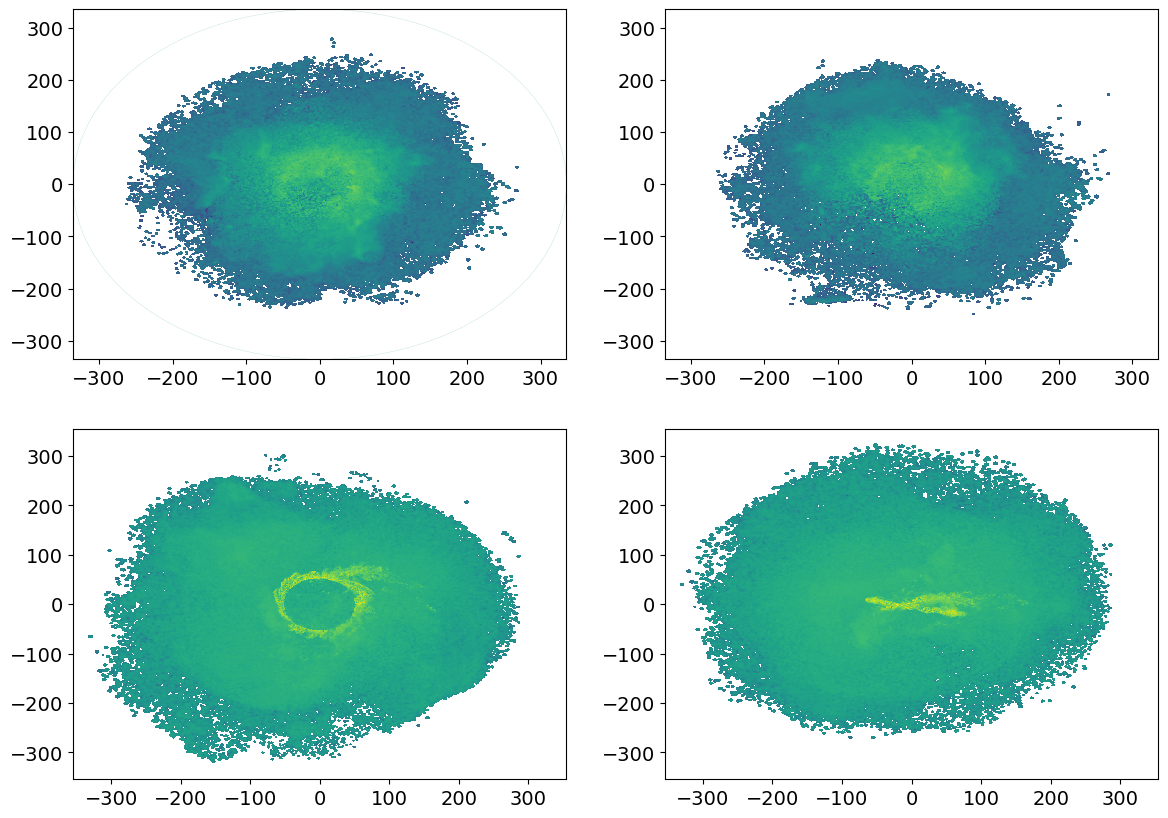

In [ ]:
# plot scattering angle or time
import matplotlib.patches as patches

plt.rcParams['font.size'] = 14

fig, ax = plt.subplots(2, 2, figsize=(14, 10))

global_min = min(rot0_1[rot0_1 > 0].min(), rot0_2[rot0_2 > 0].min(), rot90_1[rot90_1 > 0].min(), rot90_2[rot90_2 > 0].min())
global_max = max(rot0_1.max(), rot0_2.max(), rot90_1.max(), rot90_2.max())
shared_norm = matplotlib.colors.LogNorm(vmin=global_min, vmax=global_max)

circle1 = patches.Circle((0, 0), r1, edgecolor='mediumseagreen', facecolor='None', linewidth=0.1)
circle2 = patches.Circle((0, 0), r2, edgecolor='mediumseagreen', facecolor='None', linewidth=0.1)

im1 = ax[0, 0].hist2d(x1, y1, weights = rot0_1, bins = [numrays_1,numrays_1], norm=shared_norm)
ax[0, 1].hist2d(x1, y1, weights = rot90_1, bins = [numrays_1,numrays_1], norm=shared_norm)
im2 = ax[1, 0].hist2d(x2, y2, weights = rot0_2, bins = [numrays_2,numrays_2], norm=shared_norm)
ax[1, 1].hist2d(x2, y2, weights = rot90_2, bins = [numrays_2,numrays_2], norm=shared_norm)

ax[0,0].add_patch(circle1)
# ax[0,1].add_patch(circle1)
# ax[1,0].add_patch(circle2)
# ax[1,1].add_patch(circle2)

ax[0, 0].set_aspect('equal')
ax[0, 1].set_aspect('equal')
ax[1, 0].set_aspect('equal')
ax[1, 1].set_aspect('equal')

ax[0, 0].set_ylabel('y [kpc]')
ax[1, 0].set_xlabel('x [kpc]')
ax[1, 0].set_ylabel('y [kpc]')
ax[1, 1].set_xlabel('x [kpc]')

ax[0,0].set_title('m12b (no rotation)')
ax[0,1].set_title('m12b (90 degrees rotation)')
ax[1,0].set_title('m12f (no rotation)')
ax[1,1].set_title('m12f (90 degrees rotation)')


fig.colorbar(im2[3], ax=ax[:, 1], orientation='vertical')

# plt.savefig(f'outputs/{sim_name}/scattering_angle', dpi = 300)
# plt.show()

In [ ]:
# plot scattering time

fig, ax = plt.subplots()

h = ax.hist2d(x, y, weights = (tau.cgs).value, bins = [numrays,numrays], norm=matplotlib.colors.LogNorm(vmax = 1e-3))
ax.axis('equal')
ax.set_xlabel('x (kpc)')
ax.set_ylabel('y (kpc)')
fig.colorbar(h[3], label = 'scattering time (s)')

plt.savefig('outputs/m12f_res7100/scattering_time', dpi = 300)
plt.show()

Text(0, 0.5, 'number of sightlines')

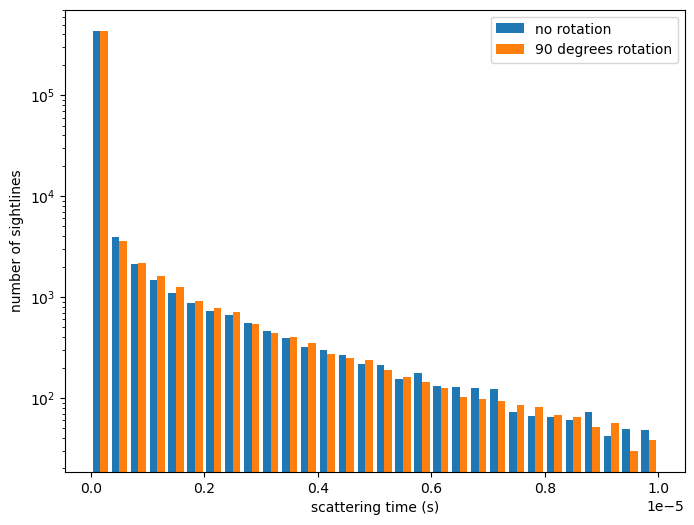

In [ ]:
# distribution of scattering times

plt.figure(figsize=(8, 6))

plt.hist([rot0, rot90], bins = 30, label=['no rotation', '90 degrees rotation'], log = True, range = [0, 1e-5])
plt.legend(loc='upper right')
plt.xlabel('scattering time (s)')
plt.ylabel('number of sightlines')

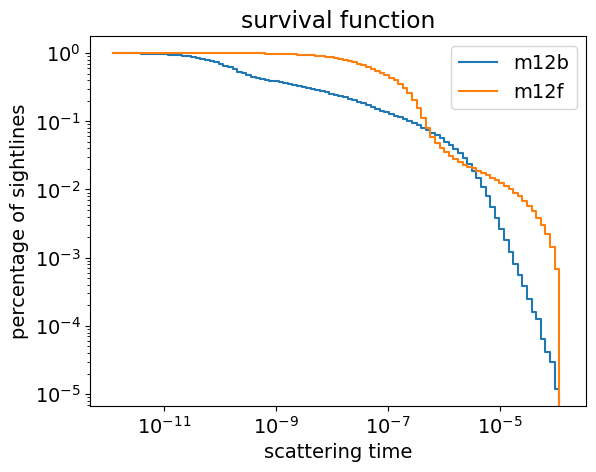

In [ ]:
bins = np.logspace(-12, np.log10(np.max(rot0_1)), 100)

hist, bin_edges = np.histogram(rot0_1, bins=bins)
cumulative_hist = np.cumsum(hist)/np.max(np.cumsum(hist))

hist2, bin_edges2 = np.histogram(rot0_2, bins=bins)
cumulative_hist2 = np.cumsum(hist2)/np.max(np.cumsum(hist2))

plt.step(bin_edges[1:], 1- cumulative_hist, where='pre', label = 'm12b')
plt.step(bin_edges[1:], 1 - cumulative_hist2, where='pre', label = 'm12f')
plt.title('survival function')
plt.xlabel('scattering time')
plt.ylabel('percentage of sightlines')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()


In [ ]:
# why is filling fraction small in some cells?
# exclude if number of cloudlets intercepted is less than 1
# histogram of scattering time vs radius
# survivorship funciton
# something with different star formation rate